In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting to Know Data

In [2]:
# Read and find out about data
# This data set is about iris flowers 
# There are 4 variables (features): sepal length, sepal width, petal length, petal width
# There is 1 output: species
# Basically, different species has different corresponding values of variables

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Find out how many species or how many classes of outputs
# From the result, there are 3 classes

df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
# Convert categorical data type of species to numerical data

df = df.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


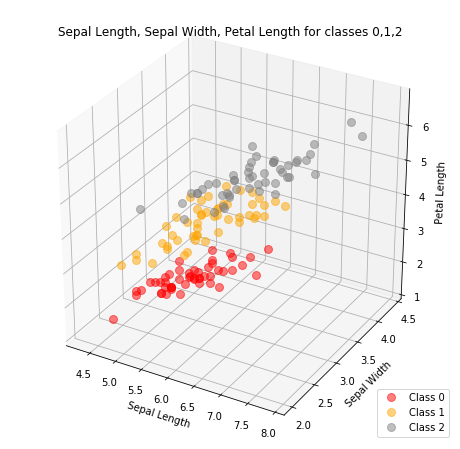

In [5]:
# Perform basic visualization to roughly see how each class (species) is distributed 
# Since there are 4 variables + 1 class, and we can perform only 3D visualization at one time, 
# the visualization will be performed twice to see all 4 variables

# Visualization #1: Sepal Length, Sepal Width, Petal Length

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(df.sepal_length[df.species==0], df.sepal_width[df.species==0], df.petal_length[df.species==0], 'o', markersize=8, color='red', alpha=0.5, label='Class 0')
ax.plot(df.sepal_length[df.species==1], df.sepal_width[df.species==1], df.petal_length[df.species==1], 'o', markersize=8, color='orange', alpha=0.5, label='Class 1')
ax.plot(df.sepal_length[df.species==2], df.sepal_width[df.species==2], df.petal_length[df.species==2], 'o', markersize=8, color='grey', alpha=0.5, label='Class 2')
plt.title('Sepal Length, Sepal Width, Petal Length for classes 0,1,2')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend(loc='lower right')

plt.show()

# From graph, each class distributes almost similarly along sepal length 
# Hence, sepal length may not be a good feature used to differentiate between different classes
# On the other hand, classes are separated along petal length axis. 
# (Class 0 is at the bottom, class 1 is in the middle, class 2 is on the top.)
# Thus, petal length may be a good feature used to separate classes

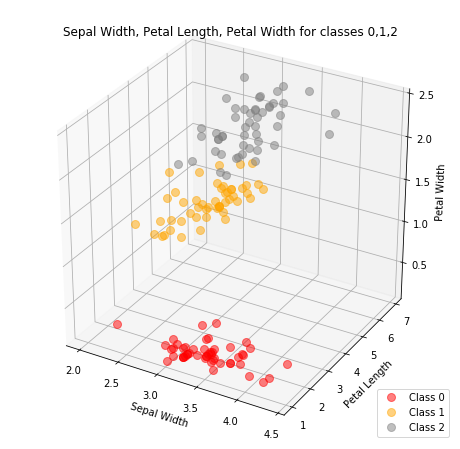

In [6]:
# Visualization #2: Sepal Width, Petal Length, Petal Width

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(df.sepal_width[df.species==0], df.petal_length[df.species==0], df.petal_width[df.species==0], 'o', markersize=8, color='red', alpha=0.5, label='Class 0')
ax.plot(df.sepal_width[df.species==1], df.petal_length[df.species==1], df.petal_width[df.species==1],  'o', markersize=8, color='orange', alpha=0.5, label='Class 1')
ax.plot(df.sepal_width[df.species==2], df.petal_length[df.species==2], df.petal_width[df.species==2], 'o', markersize=8, color='grey', alpha=0.5, label='Class 2')

plt.title('Sepal Width, Petal Length, Petal Width for classes 0,1,2')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.legend(loc='lower right')

plt.show()

# From graph, petal width may be another good feature used to separate classes
# However, sepal width may be not a good feature.

In [7]:
# Create input matrix and output class vector

X = df.drop('species',1)
y = df.species

In [8]:
# Split data into training and test sets using ratio = 70:30

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Principal Component Analysis : Manual Steps

In [9]:
# Before computing covariance matrix, the input matrix will be normalized. ( (input - mean)/SD )
# In fact, PCA requires the input matrix to be centered (input - mean) only, not scaled by SD.
# However, to compare with Scikit-learn result(which normaizes input data) below, 
# the input here is also normalized.

# First, compute mean and SD 

mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [10]:
# Normalize the input matrix for training data

scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,sepal_length,sepal_width,petal_length,petal_width
60,-1.018777,-2.367110,-0.182077,-0.290068
116,0.691856,-0.101417,0.926218,0.733700
144,0.919941,0.578291,1.037048,1.629497
119,0.121645,-1.913971,0.649144,0.349787
108,0.919941,-1.234263,1.092463,0.733700
...,...,...,...,...
9,-1.132820,0.125153,-1.290373,-1.441807
103,0.463772,-0.327986,0.981633,0.733700
67,-0.106439,-0.781125,0.150412,-0.290068
117,2.060363,1.711138,1.591196,1.245584


In [11]:
# Compute covariance matrix of normalized input

cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(4, 4)

In [12]:
# Compute eigenvalues and eigenvectors of covariance matrix

from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(4,)

In [13]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(4, 4)

In [14]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(2.8721479555636424,
  array([ 0.5355004 , -0.20419539,  0.58617426,  0.57266334])),
 (0.977708725554838,
  array([-3.25611548e-01, -9.44913832e-01,  9.09058855e-04, -3.33787741e-02])),
 (0.13348631110291825,
  array([-0.73204127,  0.23026338,  0.13706186,  0.62634528])),
 (0.01665700777859768,
  array([ 0.26708056, -0.11144895, -0.7985067 ,  0.52785808]))]

In [15]:
# Construct big_lamda matrix where diagonal entries are eigenvalues, and other entries are zeros.

p=len(X_train.columns)
big_lamda = np.identity(p)*np.array([eig_pairs[i][0] for i in range(len(eig_pairs))])
big_lamda

# Each eigenvalue specifies variance explained by PCA on different component

array([[2.87214796, 0.        , 0.        , 0.        ],
       [0.        , 0.97770873, 0.        , 0.        ],
       [0.        , 0.        , 0.13348631, 0.        ],
       [0.        , 0.        , 0.        , 0.01665701]])

In [16]:
# Construct phi matrix where each column is eigenvector corresponding to eigenvalues in big_lamda matrix

phi = np.array([list(eig_pairs[i][1]) for i in range(len(eig_pairs))]).T
phi

# Each column specifies different eigenvector of difference principal component

array([[ 5.35500399e-01, -3.25611548e-01, -7.32041268e-01,
         2.67080558e-01],
       [-2.04195389e-01, -9.44913832e-01,  2.30263378e-01,
        -1.11448955e-01],
       [ 5.86174262e-01,  9.09058855e-04,  1.37061857e-01,
        -7.98506703e-01],
       [ 5.72663340e-01, -3.33787741e-02,  6.26345277e-01,
         5.27858078e-01]])

In [17]:
# Compute percent of transformation along each component

percent_transform = [sum(big_lamda[i]) for i in range(len(big_lamda))]
percent_transform = percent_transform / sum(percent_transform)
percent_transform

# The result shows that along the first two components, percent of transformation = 96.24%
# Hence, instead of 4 variables, we can use only two components to represent the input matrix.

array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

In [18]:
# Set q = number of selected principal components = 2
# Construct phi_q matrix that contains only the first q eigenvectors

num_components = 2
phi_q = np.array([list(eig_pairs[i][1]) for i in range(num_components)]).T
phi_q

array([[ 5.35500399e-01, -3.25611548e-01],
       [-2.04195389e-01, -9.44913832e-01],
       [ 5.86174262e-01,  9.09058855e-04],
       [ 5.72663340e-01, -3.33787741e-02]])

In [19]:
# The original input matrix can be transformed to the new space using phi_q matrix
# Note that this new space = the reduced space based on number of selected principal components (=2 here)

X_train_transformed = phi_q.T.dot(X_train.T)
X_train_transformed.shape

(2, 105)

Text(0, 0.5, 'Second Principal Component')

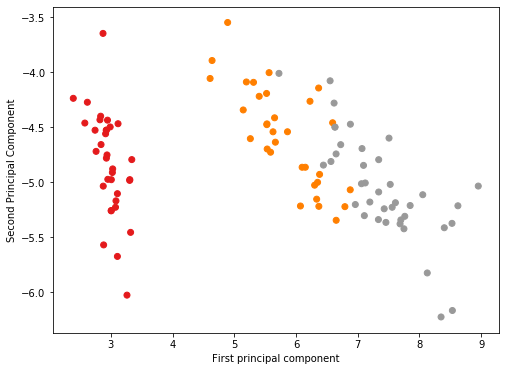

In [20]:
# Plot the new space with the transformed input data
# Originally, there are 4 variables
# Now, we can represent the input data into the new space with 2 dimensions.
# Hence, the dimension of input data is reduced from 4 to 2 here.

plt.figure(figsize=(8,6))
plt.scatter(X_train_transformed[0],X_train_transformed[1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [21]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

derived_X_train = (phi_q.dot(X_train_transformed)).T
derived_X_train - X_train

# The result shows the difference between the derived X_train (from the transformed data in new space) and the original X_train
# If num_components = 4 is used, the difference is almost zero.

,sepal_length,sepal_width,petal_length,petal_width
60,-1.224294,0.353426,-0.634849,1.920693
116,-1.055565,0.276054,-1.329279,2.446139
144,-0.832519,0.212199,-1.199050,2.081496
119,-1.162679,0.315138,-1.162133,2.389147
108,-1.182093,0.312274,-1.403202,2.653037
...,...,...,...,...
9,-1.858389,0.579568,0.211895,1.727553
103,-0.922595,0.230877,-1.445584,2.424737
67,-1.383077,0.393947,-0.862195,2.316330
117,-1.122230,0.282872,-1.702820,2.893262


## Principal Component Analysis : Scikit-Learn

In [22]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [23]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([5.89333333, 3.0447619 , 3.82857143, 1.22666667])

In [24]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

sepal_length    5.893333
sepal_width     3.044762
petal_length    3.828571
petal_width     1.226667
dtype: float64

In [25]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([0.87268242, 0.43925932, 1.79595918, 0.77769705])

In [26]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

sepal_length    0.876868
sepal_width     0.441366
petal_length    1.804573
petal_width     0.781427
dtype: float64

In [27]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

In [28]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca = PCA(n_components=num_components)
pca.fit(sk_scaled_X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# Show variances (or eigenvalues) of selected components

pca.explained_variance_

array([2.89976476, 0.98710977])

In [30]:
# Show principal components (or eigenvectors) of selected components

pca.components_

array([[ 5.35500399e-01, -2.04195389e-01,  5.86174262e-01,
         5.72663340e-01],
       [ 3.25611548e-01,  9.44913832e-01, -9.09058855e-04,
         3.33787741e-02]])

In [31]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(2.8721479555636424,
  array([ 0.5355004 , -0.20419539,  0.58617426,  0.57266334])),
 (0.977708725554838,
  array([-3.25611548e-01, -9.44913832e-01,  9.09058855e-04, -3.33787741e-02])),
 (0.13348631110291825,
  array([-0.73204127,  0.23026338,  0.13706186,  0.62634528])),
 (0.01665700777859768,
  array([ 0.26708056, -0.11144895, -0.7985067 ,  0.52785808]))]

In [32]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca.explained_variance_ratio_

array([0.71803699, 0.24442718])

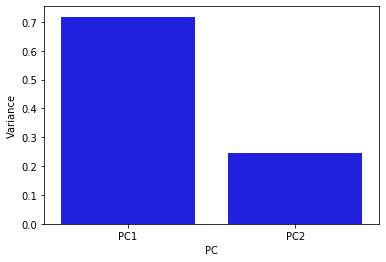

In [33]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [34]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

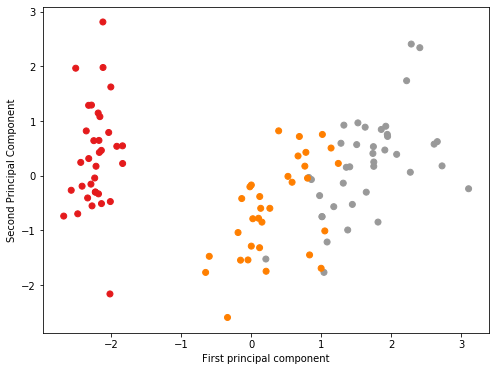

In [35]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [36]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-5.08950270e-05, -4.25352462e-04, -1.20303136e-02,
         1.22100701e-02],
       [ 8.36132190e-02, -3.06075059e-02, -1.33144959e-01,
         4.71853577e-02],
       [ 4.00633581e-01, -1.20138350e-01,  8.54108606e-02,
        -5.04898372e-01],
       [-1.39484958e-01,  4.14512645e-02, -3.99994287e-02,
         1.86156570e-01],
       [-2.28916259e-01,  6.91990561e-02, -3.36973211e-02,
         2.73227510e-01],
       [-8.11054158e-02,  2.36104840e-02, -3.66770812e-02,
         1.21803319e-01],
       [-4.42435998e-01,  1.46930362e-01,  2.94583544e-01,
         1.64581627e-01],
       [ 1.36875234e-01, -4.50941661e-02, -8.12790844e-02,
        -6.08753057e-02],
       [-7.41369903e-02,  2.24949593e-02, -8.61904797e-03,
         8.61693346e-02],
       [-1.74463210e-02,  8.90957166e-03,  9.66103461e-02,
        -7.93986447e-02],
       [-5.98613901e-02,  1.35279149e-02, -1.33410088e-01,
         1.97358008e-01],
       [ 7.55703629e-01, -2.41631254e-01, -2.48558701e-01,
      

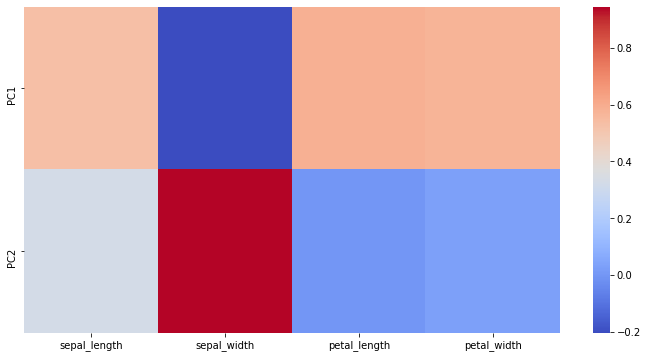

In [37]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length
